Dupla: Eduardo da Maia Haak e Lukas Thiago Rodrigues

Data: 16/09/25


### 1. Introdução e Pergunta de Negócio

Neste relatório, realizamos uma análise exploratória no dataset The Complete Pokemon Dataset, disponibilizado no kaggle. Nosso objetivo principal é investigar a seguinte pergunta de negócio: "Quais são as relações entre tipos e status base, e o grupo de crescimento dos pokémon".

A nossa variável-alvo é a coluna *experience_growth*. As análises a seguir buscam identificar quais outras variáveis têm maior influência sobre ela.

Uma breve reintrodução ao escopo do projeto:

Cada pokémon tem diversos atributos que diferem entre uma espécie e outra a fim de torná-los únicos. A maioria dos atributos definem a força de um pokémon em batalha, enquanto outros determinam coisas referentes ao crescimento e variações cosméticas.

A fim de não explicar mecânicas que fazem parte dos RPGs desde os anos 70, basta saber que pokémon diferentes precisam de valores diferentes de pontos de experiência para subir de nível, e nossa intenção é descobrir se há fatores dentro das demais características do pokémon que ditam essa velocidade de crescimento das criaturinhas.

### 2. Análise Univariada: Entendendo as Variáveis Principais


Primeiro, analisamos a distribuição das variáveis mais importantes individualmente para
entender o perfil dos nossos dados.


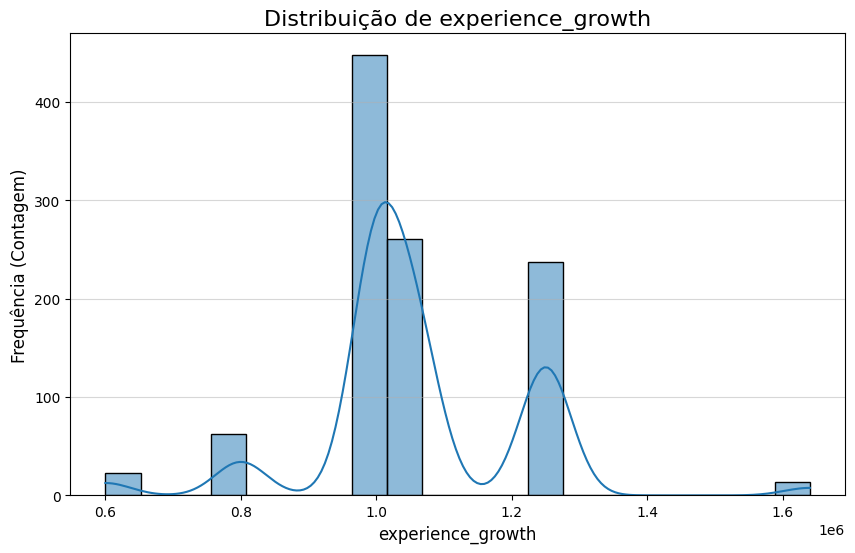

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/pokemon_finalizado.csv')

coluna_numerica = 'experience_growth'
if coluna_numerica in df.columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[coluna_numerica], kde=True, bins=20)
  plt.title(f'Distribuição de {coluna_numerica}', fontsize=16)
  plt.xlabel(coluna_numerica, fontsize=12)
  plt.ylabel('Frequência (Contagem)', fontsize=12)
  plt.grid(axis='y', alpha=0.5)
  plt.show()
else:
  print(f"A coluna '{coluna_numerica}' não foi encontrada. Verifique o nome da coluna.")


Insight 1: O gráfico acima mostra que a maioria dos pokémon estão concentrados na metade, o que representa os grupos* medium-slow* e *medium-fast*. Isso é esperado, já que existem muitos pokémon "medianos" em força. Mesma assim, pode-se observar uma discrepância entre os grupos *medium-slow* e *medium-fast*, em que o segundo tem quase o dobro de ocorrências do que o primeiro.


### 3. Análise Bivariada: Buscando Relações com a Variável-Alvo

Agora, começamos a cruzar variáveis para encontrar relações que nos ajudem a responder nossa pergunta. Nossa primeira hipótese é que *base_total* influencia *experience_growth*.

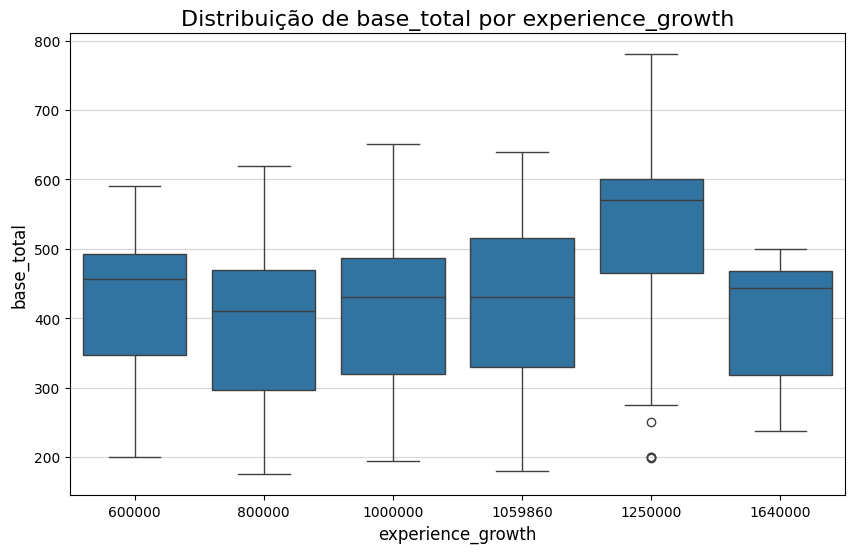

In [2]:
df = pd.read_csv('../data/pokemon_finalizado.csv')

var_categorica = 'experience_growth'
var_numerica = 'base_total'

if var_categorica in df.columns and var_numerica in df.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[var_categorica], y=df[var_numerica])
  plt.title(f'Distribuição de {var_numerica} por {var_categorica}', fontsize=16)
  plt.xlabel(var_categorica, fontsize=12)
  plt.ylabel(var_numerica, fontsize=12)
  plt.grid(axis='y', alpha=0.5)
  plt.show()
else:
  print(f"Verifique se as colunas '{var_categorica}' e '{var_numerica}' existem no seu dataset.")


Insight 2: O boxplot revela claramente uma constância, quanto maior o status, maior é o grupo de expêriencia. A única categoria a apresentar outliers é *slow* (1250000) e isso provavelmente se deve ao fato de haverem pré-evoluções do pokémon muito fortes mas que não são tão fortes antes de evoluir. Isso é perceptível pela presença de pokémon com status base baixos em todas as categorias.

Outras anomalias são as categorias *erratic* (600000) e *fluctuating* (1640000) que apesar de suas posições nos gráficos, na verdade são as categorias mais lenta de level up e mais rápida, respecivamente. O motivo delas terem quantidades de xp totais não condizentes é por que elas compensam sua velocidade/lentidão nos últimos níveis (level 90 - 100), onde elas se tornam o oposto da velocidade que elas tinham anteriormente. Além disso, esses dois grupos apresentam poucos membros, o que dificulta a realização de uma análise objetiva.

### 4. Análise Multivariada: Aprofundando nos Padrões

Para aprofundar, usamos um heatmap para ter uma visão geral de todas as correlações e um
scatter plot com hue para investigar subgrupos.

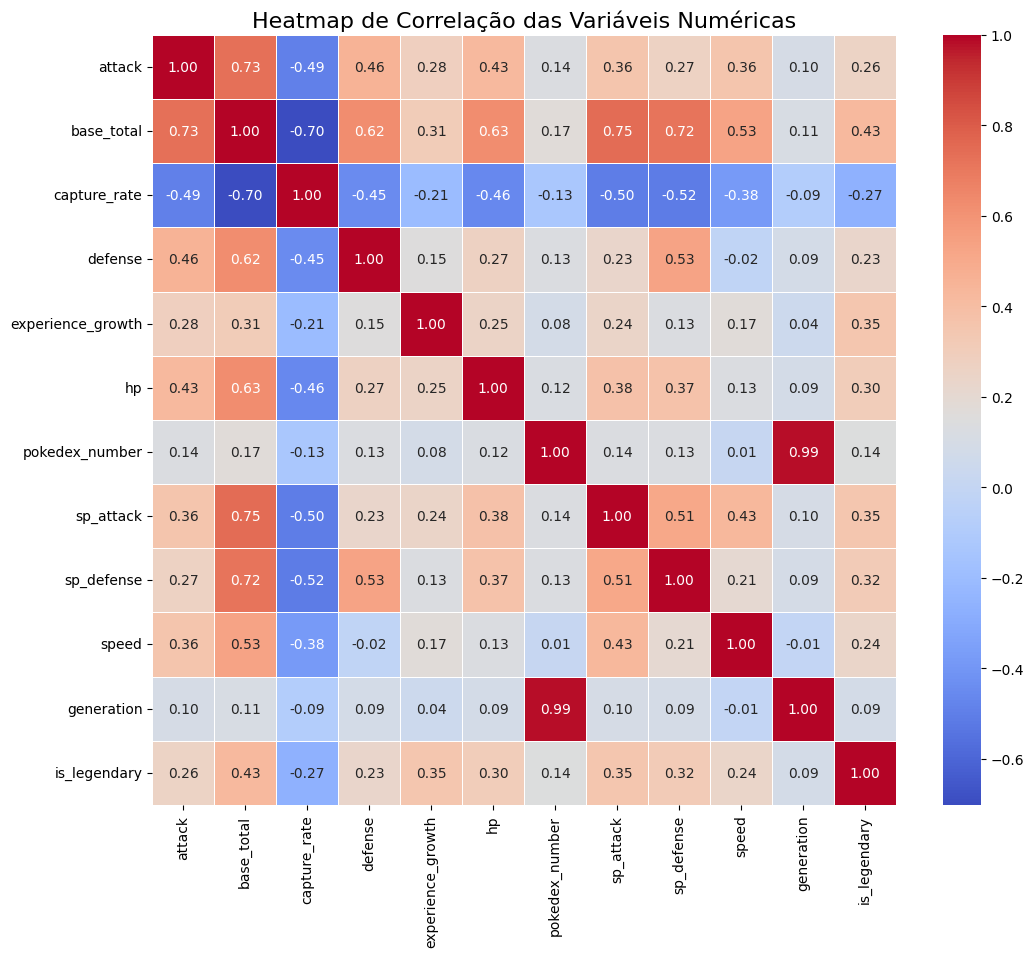

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/pokemon_finalizado.csv')

df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
correlation_matrix,
annot=True,
cmap='coolwarm',
fmt='.2f',
linewidths=.5)
plt.title('Heatmap de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()


Insight 3: Esse gráfico mostra o oposto do que foi visto no scatter plot da aula passada, aqui está mostrando que *base_total* tem uma correlação fraca com *capture_rate*, enquanto o scatter plot mostrava o contrário. Outro ponto a se observar, é que o *base_total* também não tem correlação com o *capture_rate*, indo contra o que estávamos pensando.

Agora, se tratando de correlações fortes, o gráfico nos mostra que existe uma entre *generation* e *pokedex_number*, o que não é nem um pouco surpreendente já que a cada geração os números incrementam de onde pararam na geração anterior.

Outras correlações esperadas são *sp_attack*, *attack*, *sp_defense*, *hp*, *defense* e *speed* contribuindo para *base_total*, embora seja interessante ver os pesos, significando que há mais pokémon com ataque especial alto do que velocidade. Além disso *is_legendary* tem uma correlação relativamente alta com *base_total*, o que também faz sentido e é até meio estranho que não seja maior.

Além desse gráfico, nós experimentamos computar pokémon de cada geração individualmente mas os gráficos ficaram praticamente idênticos, variando muito pouco entre os números, mas mostrando que há sim algum tipo de balanceamento ou padronização intencional entre cada adição de criaturas.


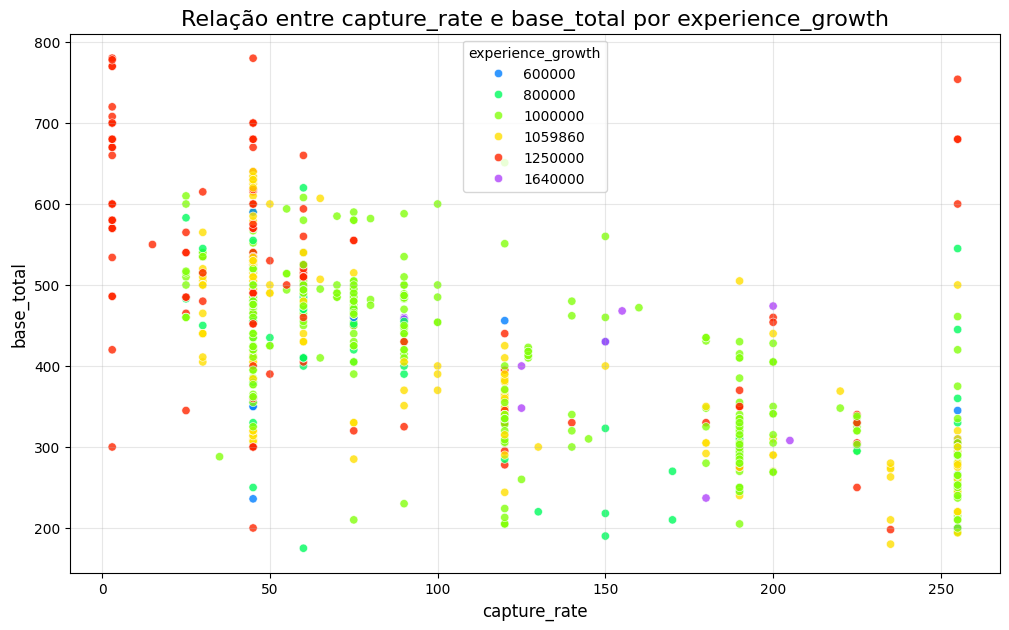

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/pokemon_finalizado.csv')

var_x = 'capture_rate'
var_y = 'base_total'
hue_var = 'experience_growth'

if var_x in df.columns and var_y in df.columns and hue_var in df.columns:
    df[hue_var] = df[hue_var].astype("category")

    plt.figure(figsize=(12, 7))
    sns.scatterplot(
        x=df[var_x],
        y=df[var_y],
        hue=df[hue_var],
        palette="gist_ncar",
        alpha=0.8
    )
    plt.title(f'Relação entre {var_x} e {var_y} por {hue_var}', fontsize=16)
    plt.xlabel(var_x, fontsize=12)
    plt.ylabel(var_y, fontsize=12)
    plt.legend(title=hue_var)
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print(f"Verifique se as colunas '{var_x}', '{var_y}' e '{hue_var}' existem no dataset.")


Insight 4: Esse gráfico de dispersão mostra que existem pokémon com status base altos que são que são bem fáceis de capturar, e isso vai de encontro ao que foi dito anteriormente, são eventos scriptados pelo próprio jogo.

Outras informações que podemos extraír pelas cores são que: os grupos de experiência mais lentos tendem a se concentrar dentre os mais difíceis de capturar e os grupos erratic e fluctuating se fazem presentes em quase todos os quadrantes.

Além disso, pode-se observar a relação óbvia de que pokémon mais fortes são em geral mais difíceis de capturar.

O gráfico aparenta ter uma quantidade elevada de outliers, mas isso pode ser explicado através de decisões de design que não necessáriamente tem a ver com os atributos sendo analizados, mas sim outras características únicas que não se podem ser quantificadas da forma que fizemos com os atributos. O importante é que a tendência é tangível.

### 5. Conclusão e Próximos Passos para a Modelagem

Resumo dos Principais Achados:

Achado 1: A maioria dos pokémon se encontra nos grupos de crescimento intermediários (*medium-fast* e *medium-slow*).

Achado 2: Quanto maior o *base_total* do pokémon, maior é a quantidade de *experience_growth* necessária para atingir o nível máximo.

Achado 3: *experience_growth* não parece ser tão afetado por algum atributo individualmente, mas está na meio de outras relações entre multiplos atributos, mostrando que sua tendência é uma das duas: complicada ou inexistente.

Recomendação para a Modelagem: Com base nesta análise, as variáveis mais promissoras para incluir em um modelo preditivo para 'experience_growth' são:
1. *base_total* - Devido à sua forte correlação mostrada no boxplot além de ter uma forte correlação com outras variáveis, como a *is_legendary* por exemplo.
2. *capture_rate* - Porque suas relações com as demais variaveis revelam mais sobre as tendências do *experience_growth*, além da relação entre as duas.
3. *is_legendary* - Apresente uma correlação forte com *experience_growth*, pelo menos de acordo com o heatmap.